In [16]:
import pandas as pd
import numpy as np
from scipy import integrate

In [32]:
FILEPATH = "../../csv/metrics/ETHUSD-600-20210401-20210630"

In [33]:
FILENAME_KS = f"{FILEPATH}-ks.csv"

In [34]:
df_ks = pd.read_csv(FILENAME_KS)
df_ks

,Unnamed: 0,alpha=0.01,alpha=0.025,alpha=0.05,alpha=0.075,alpha=0.1
0,n=86400,2.676722e-06,1.573218e-06,1.085034e-06,8.736135e-07,7.420050e-07
1,n=172800,2.115967e-06,1.244877e-06,8.595125e-07,6.926202e-07,5.887304e-07
2,n=259200,1.844423e-06,1.085880e-06,7.503045e-07,6.049749e-07,5.145078e-07
3,n=345600,1.673315e-06,9.856903e-07,6.814891e-07,5.497468e-07,4.677378e-07
4,n=432000,1.551689e-06,9.144744e-07,6.325742e-07,5.104900e-07,4.344930e-07
5,n=518400,1.458963e-06,8.601800e-07,5.952819e-07,4.805609e-07,4.091476e-07
6,n=604800,1.384941e-06,8.168376e-07,5.655121e-07,4.566690e-07,3.889146e-07
7,n=691200,1.323893e-06,7.810919e-07,5.409600e-07,4.369647e-07,3.722280e-07
8,n=777600,1.272305e-06,7.508858e-07,5.202129e-07,4.203139e-07,3.581273e-07
9,n=864000,1.227883e-06,7.248751e-07,5.023474e-07,4.059759e-07,3.459851e-07


In [35]:
# 30d in is in seconds ...
30 * 86400

2592000

<AxesSubplot:>

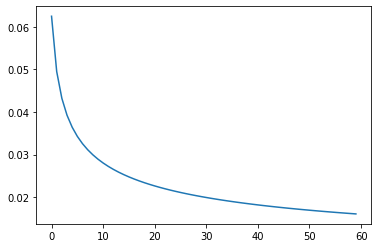

In [36]:
(df_ks['alpha=0.05'] * 2 * 3600 * 8).plot()

In [37]:
# looks right at VaR => 0 after 30d charging about ~2% per 8h in extreme

In [38]:
# Look at the EV, VaR, ES calcs

In [39]:
FILENAME_VARS = f"{FILEPATH}-nvars-long-alpha-0.05.csv"

In [40]:
df_vars = pd.read_csv(FILENAME_VARS)
df_vars

,Unnamed: 0,k=1.085034172449585e-06,k=8.595124868742567e-07,k=7.503045279039347e-07,k=6.814890575778717e-07,k=6.32574188945293e-07,k=5.952819360198797e-07,k=5.655120820061992e-07,k=5.409600379512467e-07,k=5.202128764269743e-07,...,k=2.942055530451567e-07,k=2.923569061612607e-07,k=2.905553352519495e-07,k=2.887987866527444e-07,k=2.870853322194003e-07,k=2.8541315953886223e-07,k=2.8378056306294137e-07,k=2.821859360632414e-07,k=2.8062776331856415e-07,k=2.7910461445694035e-07
0,t=3600,0.015206,0.016856,0.017656,0.018160,0.018519,0.018792,0.019011,0.019191,0.019343,...,0.021003,0.021017,0.021030,0.021043,0.021055,0.021068,0.021080,0.021091,0.021103,0.021114
1,t=7200,0.020792,0.024112,0.025724,0.026741,0.027465,0.028016,0.028457,0.028821,0.029128,...,0.032483,0.032511,0.032537,0.032563,0.032589,0.032614,0.032638,0.032662,0.032685,0.032708
2,t=10800,0.024179,0.029181,0.031611,0.033146,0.034238,0.035071,0.035737,0.036286,0.036751,...,0.041824,0.041866,0.041907,0.041946,0.041985,0.042022,0.042059,0.042095,0.042130,0.042164
3,t=14400,0.026335,0.033023,0.036277,0.038333,0.039796,0.040914,0.041807,0.042543,0.043167,...,0.049979,0.050035,0.050089,0.050142,0.050194,0.050245,0.050294,0.050342,0.050389,0.050435
4,t=18000,0.027660,0.036037,0.040119,0.042699,0.044536,0.045940,0.047061,0.047987,0.048770,...,0.057338,0.057408,0.057477,0.057544,0.057609,0.057673,0.057735,0.057796,0.057855,0.057913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999759,-0.997517,-0.992321,-0.984357,-0.974061,-0.961857,-0.948110,-0.933115,-0.917112,...,-0.142326,-0.125775,-0.109339,-0.093015,-0.076804,-0.060705,-0.044715,-0.028834,-0.013062,0.002604
1436,t=5173200,-0.999760,-0.997529,-0.992352,-0.984412,-0.974143,-0.961969,-0.948250,-0.933284,-0.917310,...,-0.142976,-0.126426,-0.109991,-0.093668,-0.077457,-0.061357,-0.045367,-0.029487,-0.013714,0.001952
1437,t=5176800,-0.999762,-0.997541,-0.992383,-0.984468,-0.974226,-0.962080,-0.948390,-0.933453,-0.917507,...,-0.143626,-0.127077,-0.110642,-0.094320,-0.078109,-0.062010,-0.046020,-0.030139,-0.014365,0.001302
1438,t=5180400,-0.999763,-0.997553,-0.992413,-0.984523,-0.974308,-0.962191,-0.948530,-0.933621,-0.917703,...,-0.144276,-0.127728,-0.111293,-0.094972,-0.078761,-0.062662,-0.046672,-0.030790,-0.015017,0.000651


In [41]:
# get k at 30d to use for VaR plots
print('n[29]', df_ks['Unnamed: 0'][29])
print('k[29]', df_ks['alpha=0.05'][29])

n[29] n=2592000
k[29] 3.497682457898884e-07


In [43]:
# Find k column manually
df_vars.columns

Index(['Unnamed: 0', 'k=1.085034172449585e-06', 'k=8.595124868742567e-07',
       'k=7.503045279039347e-07', 'k=6.814890575778717e-07',
       'k=6.32574188945293e-07', 'k=5.952819360198797e-07',
       'k=5.655120820061992e-07', 'k=5.409600379512467e-07',
       'k=5.202128764269743e-07', 'k=5.023473757793634e-07',
       'k=4.86730125670523e-07', 'k=4.7290943177396224e-07',
       'k=4.6055291632046874e-07', 'k=4.4940955641763905e-07',
       'k=4.392855711782698e-07', 'k=4.3002854182585765e-07',
       'k=4.215166273664622e-07', 'k=4.1365104432137354e-07',
       'k=4.0635070035981275e-07', 'k=3.9954828660532175e-07',
       'k=3.9318738062784736e-07', 'k=3.8722026407630216e-07',
       'k=3.816062548751894e-07', 'k=3.763104160213598e-07',
       'k=3.7130254410743185e-07', 'k=3.665563684246821e-07',
       'k=3.620489105456233e-07', 'k=3.577599675875532e-07',
       'k=3.536716917868518e-07', 'k=3.4976824578988837e-07',
       'k=3.460355179984797e-07', 'k=3.4246088594017104e-07',


In [44]:
k_col = 'k=3.4976824578988837e-07'

In [45]:
df_vars[k_col]

0       0.020595
1       0.031657
2       0.040575
3       0.048300
4       0.055225
          ...   
1435   -0.517129
1436   -0.517688
1437   -0.518246
1438   -0.518804
1439   -0.519362
Name: k=3.4976824578988837e-07, Length: 1440, dtype: float64

In [46]:
# vars calculated to 60d out ...
5184000/86400

60.0

In [47]:
# at 30d, should get var = 0

In [48]:
5184000/2

2592000.0

In [49]:
# this is the element/row + 1 index in vars df
2592000.0 / 3600

720.0

In [50]:
df_vars.iloc[719]

Unnamed: 0                  t=2592000
k=1.085034172449585e-06     -0.977888
k=8.595124868742567e-07     -0.928818
k=7.503045279039347e-07     -0.874617
k=6.814890575778717e-07     -0.820869
                              ...    
k=2.8541315953886223e-07     0.396008
k=2.8378056306294137e-07     0.407873
k=2.821859360632414e-07       0.41956
k=2.8062776331856415e-07     0.431073
k=2.7910461445694035e-07     0.442417
Name: 719, Length: 61, dtype: object

In [51]:
# nice ... goes to zero exactly at 30d out (index 719). Math! :)
df_vars[k_col][715:725]

715    0.003296
716    0.002472
717    0.001648
718    0.000824
719    0.000000
720   -0.000824
721   -0.001649
722   -0.002473
723   -0.003297
724   -0.004122
Name: k=3.4976824578988837e-07, dtype: float64

<AxesSubplot:>

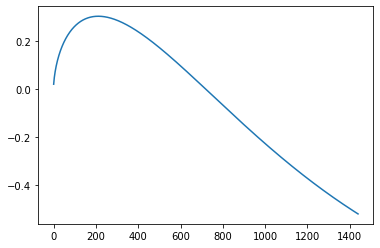

In [53]:
# look at the VaR curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=30d for calibration
# imbalance completely to one side
df_vars[k_col].plot()

In [54]:
# express the x axis in terms of days to make life easier ...
taus = [(i+1) * 3600.0 / 86400.0 for i in df_vars.index]
taus

[0.041666666666666664,
 0.08333333333333333,
 0.125,
 0.16666666666666666,
 0.20833333333333334,
 0.25,
 0.2916666666666667,
 0.3333333333333333,
 0.375,
 0.4166666666666667,
 0.4583333333333333,
 0.5,
 0.5416666666666666,
 0.5833333333333334,
 0.625,
 0.6666666666666666,
 0.7083333333333334,
 0.75,
 0.7916666666666666,
 0.8333333333333334,
 0.875,
 0.9166666666666666,
 0.9583333333333334,
 1.0,
 1.0416666666666667,
 1.0833333333333333,
 1.125,
 1.1666666666666667,
 1.2083333333333333,
 1.25,
 1.2916666666666667,
 1.3333333333333333,
 1.375,
 1.4166666666666667,
 1.4583333333333333,
 1.5,
 1.5416666666666667,
 1.5833333333333333,
 1.625,
 1.6666666666666667,
 1.7083333333333333,
 1.75,
 1.7916666666666667,
 1.8333333333333333,
 1.875,
 1.9166666666666667,
 1.9583333333333333,
 2.0,
 2.0416666666666665,
 2.0833333333333335,
 2.125,
 2.1666666666666665,
 2.2083333333333335,
 2.25,
 2.2916666666666665,
 2.3333333333333335,
 2.375,
 2.4166666666666665,
 2.4583333333333335,
 2.5,
 2.5416666

In [55]:
# check 1d is 1d
taus[23]

1.0

In [56]:
# set back in df vars (remember, tau is in days)
df_vars['tau'] = taus
df_vars

,Unnamed: 0,k=1.085034172449585e-06,k=8.595124868742567e-07,k=7.503045279039347e-07,k=6.814890575778717e-07,k=6.32574188945293e-07,k=5.952819360198797e-07,k=5.655120820061992e-07,k=5.409600379512467e-07,k=5.202128764269743e-07,...,k=2.923569061612607e-07,k=2.905553352519495e-07,k=2.887987866527444e-07,k=2.870853322194003e-07,k=2.8541315953886223e-07,k=2.8378056306294137e-07,k=2.821859360632414e-07,k=2.8062776331856415e-07,k=2.7910461445694035e-07,tau
0,t=3600,0.015206,0.016856,0.017656,0.018160,0.018519,0.018792,0.019011,0.019191,0.019343,...,0.021017,0.021030,0.021043,0.021055,0.021068,0.021080,0.021091,0.021103,0.021114,0.041667
1,t=7200,0.020792,0.024112,0.025724,0.026741,0.027465,0.028016,0.028457,0.028821,0.029128,...,0.032511,0.032537,0.032563,0.032589,0.032614,0.032638,0.032662,0.032685,0.032708,0.083333
2,t=10800,0.024179,0.029181,0.031611,0.033146,0.034238,0.035071,0.035737,0.036286,0.036751,...,0.041866,0.041907,0.041946,0.041985,0.042022,0.042059,0.042095,0.042130,0.042164,0.125000
3,t=14400,0.026335,0.033023,0.036277,0.038333,0.039796,0.040914,0.041807,0.042543,0.043167,...,0.050035,0.050089,0.050142,0.050194,0.050245,0.050294,0.050342,0.050389,0.050435,0.166667
4,t=18000,0.027660,0.036037,0.040119,0.042699,0.044536,0.045940,0.047061,0.047987,0.048770,...,0.057408,0.057477,0.057544,0.057609,0.057673,0.057735,0.057796,0.057855,0.057913,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999759,-0.997517,-0.992321,-0.984357,-0.974061,-0.961857,-0.948110,-0.933115,-0.917112,...,-0.125775,-0.109339,-0.093015,-0.076804,-0.060705,-0.044715,-0.028834,-0.013062,0.002604,59.833333
1436,t=5173200,-0.999760,-0.997529,-0.992352,-0.984412,-0.974143,-0.961969,-0.948250,-0.933284,-0.917310,...,-0.126426,-0.109991,-0.093668,-0.077457,-0.061357,-0.045367,-0.029487,-0.013714,0.001952,59.875000
1437,t=5176800,-0.999762,-0.997541,-0.992383,-0.984468,-0.974226,-0.962080,-0.948390,-0.933453,-0.917507,...,-0.127077,-0.110642,-0.094320,-0.078109,-0.062010,-0.046020,-0.030139,-0.014365,0.001302,59.916667
1438,t=5180400,-0.999763,-0.997553,-0.992413,-0.984523,-0.974308,-0.962191,-0.948530,-0.933621,-0.917703,...,-0.127728,-0.111293,-0.094972,-0.078761,-0.062662,-0.046672,-0.030790,-0.015017,0.000651,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

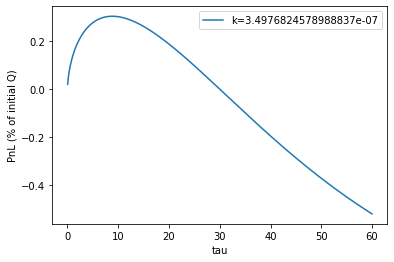

In [57]:
# now make the graph pretty ...
# y axis is % of initial Q at risk to printing as PnL
df_vars.plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

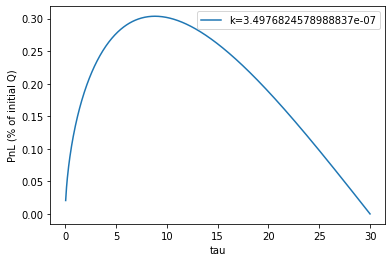

In [58]:
# Look at VaR only over the anchor time ... (first 30d)
df_vars[:720].plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

In [59]:
# Max 95% VaR value occurs about 7d in at 30% of initial Q. Should use ES to calibrate OI caps! ...

In [60]:
# Look at EV first. It won't be a good measure of how to set OI caps because of losses in there, but still look

In [61]:
FILENAME_EVS = f"{FILEPATH}-nevs-long-alpha-0.05.csv"

In [62]:
df_evs = pd.read_csv(FILENAME_EVS)
df_evs

,Unnamed: 0,k=1.085034172449585e-06,k=8.595124868742567e-07,k=7.503045279039347e-07,k=6.814890575778717e-07,k=6.32574188945293e-07,k=5.952819360198797e-07,k=5.655120820061992e-07,k=5.409600379512467e-07,k=5.202128764269743e-07,...,k=2.942055530451567e-07,k=2.923569061612607e-07,k=2.905553352519495e-07,k=2.887987866527444e-07,k=2.870853322194003e-07,k=2.8541315953886223e-07,k=2.8378056306294137e-07,k=2.821859360632414e-07,k=2.8062776331856415e-07,k=2.7910461445694035e-07
0,t=3600,-0.006785,-0.005171,-0.004389,-0.003895,-0.003544,-0.003277,-0.003063,-0.002887,-0.002738,...,-0.001114,-0.001101,-0.001088,-0.001075,-0.001063,-0.001051,-0.001039,-0.001027,-0.001016,-0.001005
1,t=7200,-0.013525,-0.010317,-0.008759,-0.007776,-0.007077,-0.006544,-0.006118,-0.005766,-0.005469,...,-0.002227,-0.002201,-0.002175,-0.002150,-0.002125,-0.002101,-0.002078,-0.002055,-0.002032,-0.002010
2,t=10800,-0.020221,-0.015436,-0.013111,-0.011643,-0.010598,-0.009801,-0.009164,-0.008638,-0.008194,...,-0.003340,-0.003301,-0.003262,-0.003224,-0.003187,-0.003151,-0.003116,-0.003082,-0.003048,-0.003015
3,t=14400,-0.026871,-0.020530,-0.017445,-0.015496,-0.014108,-0.013048,-0.012202,-0.011503,-0.010912,...,-0.004453,-0.004400,-0.004348,-0.004298,-0.004249,-0.004201,-0.004154,-0.004108,-0.004064,-0.004020
4,t=18000,-0.033478,-0.025599,-0.021760,-0.019334,-0.017605,-0.016286,-0.015231,-0.014360,-0.013624,...,-0.005565,-0.005499,-0.005435,-0.005372,-0.005311,-0.005251,-0.005192,-0.005135,-0.005079,-0.005025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999968,-0.999667,-0.998971,-0.997904,-0.996524,-0.994888,-0.993046,-0.991036,-0.988891,...,-0.885054,-0.882836,-0.880633,-0.878445,-0.876273,-0.874115,-0.871972,-0.869844,-0.867730,-0.865631
1436,t=5173200,-0.999968,-0.999669,-0.998976,-0.997913,-0.996538,-0.994908,-0.993071,-0.991068,-0.988929,...,-0.885257,-0.883041,-0.880841,-0.878655,-0.876485,-0.874329,-0.872188,-0.870062,-0.867951,-0.865853
1437,t=5176800,-0.999968,-0.999671,-0.998981,-0.997923,-0.996553,-0.994928,-0.993097,-0.991099,-0.988966,...,-0.885459,-0.883246,-0.881048,-0.878865,-0.876696,-0.874543,-0.872404,-0.870280,-0.868171,-0.866075
1438,t=5180400,-0.999968,-0.999673,-0.998986,-0.997932,-0.996567,-0.994948,-0.993123,-0.991131,-0.989004,...,-0.885662,-0.883450,-0.881255,-0.879074,-0.876908,-0.874757,-0.872620,-0.870498,-0.868390,-0.866297


In [63]:
k_col in df_evs.columns

True

In [64]:
df_evs[k_col]

0      -0.001513
1      -0.003025
2      -0.004536
3      -0.006045
4      -0.007553
          ...   
1435   -0.935285
1436   -0.935425
1437   -0.935565
1438   -0.935705
1439   -0.935844
Name: k=3.4976824578988837e-07, Length: 1440, dtype: float64

<AxesSubplot:>

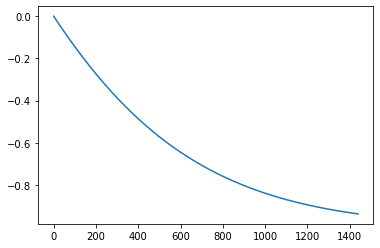

In [65]:
# look at the EV curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=30d for calibration
# imbalance completely to one side
df_evs[k_col].plot()

In [66]:
# set tau back in df evs (remember, tau is in days)
df_evs['tau'] = taus
df_evs

,Unnamed: 0,k=1.085034172449585e-06,k=8.595124868742567e-07,k=7.503045279039347e-07,k=6.814890575778717e-07,k=6.32574188945293e-07,k=5.952819360198797e-07,k=5.655120820061992e-07,k=5.409600379512467e-07,k=5.202128764269743e-07,...,k=2.923569061612607e-07,k=2.905553352519495e-07,k=2.887987866527444e-07,k=2.870853322194003e-07,k=2.8541315953886223e-07,k=2.8378056306294137e-07,k=2.821859360632414e-07,k=2.8062776331856415e-07,k=2.7910461445694035e-07,tau
0,t=3600,-0.006785,-0.005171,-0.004389,-0.003895,-0.003544,-0.003277,-0.003063,-0.002887,-0.002738,...,-0.001101,-0.001088,-0.001075,-0.001063,-0.001051,-0.001039,-0.001027,-0.001016,-0.001005,0.041667
1,t=7200,-0.013525,-0.010317,-0.008759,-0.007776,-0.007077,-0.006544,-0.006118,-0.005766,-0.005469,...,-0.002201,-0.002175,-0.002150,-0.002125,-0.002101,-0.002078,-0.002055,-0.002032,-0.002010,0.083333
2,t=10800,-0.020221,-0.015436,-0.013111,-0.011643,-0.010598,-0.009801,-0.009164,-0.008638,-0.008194,...,-0.003301,-0.003262,-0.003224,-0.003187,-0.003151,-0.003116,-0.003082,-0.003048,-0.003015,0.125000
3,t=14400,-0.026871,-0.020530,-0.017445,-0.015496,-0.014108,-0.013048,-0.012202,-0.011503,-0.010912,...,-0.004400,-0.004348,-0.004298,-0.004249,-0.004201,-0.004154,-0.004108,-0.004064,-0.004020,0.166667
4,t=18000,-0.033478,-0.025599,-0.021760,-0.019334,-0.017605,-0.016286,-0.015231,-0.014360,-0.013624,...,-0.005499,-0.005435,-0.005372,-0.005311,-0.005251,-0.005192,-0.005135,-0.005079,-0.005025,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999968,-0.999667,-0.998971,-0.997904,-0.996524,-0.994888,-0.993046,-0.991036,-0.988891,...,-0.882836,-0.880633,-0.878445,-0.876273,-0.874115,-0.871972,-0.869844,-0.867730,-0.865631,59.833333
1436,t=5173200,-0.999968,-0.999669,-0.998976,-0.997913,-0.996538,-0.994908,-0.993071,-0.991068,-0.988929,...,-0.883041,-0.880841,-0.878655,-0.876485,-0.874329,-0.872188,-0.870062,-0.867951,-0.865853,59.875000
1437,t=5176800,-0.999968,-0.999671,-0.998981,-0.997923,-0.996553,-0.994928,-0.993097,-0.991099,-0.988966,...,-0.883246,-0.881048,-0.878865,-0.876696,-0.874543,-0.872404,-0.870280,-0.868171,-0.866075,59.916667
1438,t=5180400,-0.999968,-0.999673,-0.998986,-0.997932,-0.996567,-0.994948,-0.993123,-0.991131,-0.989004,...,-0.883450,-0.881255,-0.879074,-0.876908,-0.874757,-0.872620,-0.870498,-0.868390,-0.866297,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

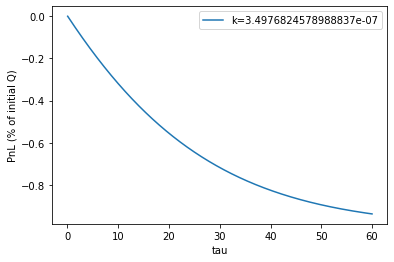

In [67]:
# now make the graph pretty ...
# y axis is % of initial Q expected to be printed as PnL
df_evs.plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

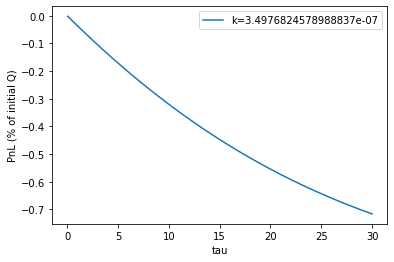

In [68]:
# Look at EV only over the anchor time ... (first 30d)
df_evs[:720].plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

In [69]:
# Yup use ES to calibrate caps on initial Q ... since EV decays like e**(-constant * t) the longer position is held
# NOTE: negative EV to hold position throughout entire anchor time when trading against ONLY the protocol, due to funding

In [70]:
FILENAME_ESS = f"{FILEPATH}-ness-long-conditional-alpha-0.05.csv"

In [71]:
df_ess = pd.read_csv(FILENAME_ESS)
df_ess

,Unnamed: 0,k=1.085034172449585e-06,k=8.595124868742567e-07,k=7.503045279039347e-07,k=6.814890575778717e-07,k=6.32574188945293e-07,k=5.952819360198797e-07,k=5.655120820061992e-07,k=5.409600379512467e-07,k=5.202128764269743e-07,...,k=2.942055530451567e-07,k=2.923569061612607e-07,k=2.905553352519495e-07,k=2.887987866527444e-07,k=2.870853322194003e-07,k=2.8541315953886223e-07,k=2.8378056306294137e-07,k=2.821859360632414e-07,k=2.8062776331856415e-07,k=2.7910461445694035e-07
0,t=3600,0.059264,0.060986,0.061820,0.062346,0.062721,0.063006,0.063234,0.063422,0.063581,...,0.065313,0.065327,0.065341,0.065354,0.065367,0.065380,0.065393,0.065405,0.065417,0.065429
1,t=7200,0.093285,0.096841,0.098567,0.099656,0.100431,0.101022,0.101494,0.101884,0.102213,...,0.105806,0.105836,0.105864,0.105892,0.105920,0.105946,0.105972,0.105998,0.106022,0.106047
2,t=10800,0.121210,0.126685,0.129345,0.131025,0.132221,0.133133,0.133862,0.134464,0.134972,...,0.140526,0.140572,0.140616,0.140660,0.140702,0.140743,0.140783,0.140823,0.140861,0.140898
3,t=14400,0.145578,0.153043,0.156675,0.158970,0.160603,0.161851,0.162847,0.163670,0.164365,...,0.171969,0.172031,0.172092,0.172151,0.172209,0.172266,0.172321,0.172375,0.172427,0.172479
4,t=18000,0.167457,0.176974,0.181610,0.184541,0.186629,0.188223,0.189497,0.190549,0.191438,...,0.201172,0.201252,0.201330,0.201406,0.201480,0.201552,0.201623,0.201692,0.201759,0.201825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999787,-0.997811,-0.993230,-0.986210,-0.977133,-0.966375,-0.954256,-0.941036,-0.926929,...,-0.243907,-0.229317,-0.214827,-0.200437,-0.186146,-0.171953,-0.157857,-0.143857,-0.129953,-0.116143
1436,t=5173200,-0.999789,-0.997823,-0.993261,-0.986265,-0.977216,-0.966488,-0.954400,-0.941212,-0.927136,...,-0.244819,-0.230236,-0.215753,-0.201370,-0.187085,-0.172899,-0.158809,-0.144815,-0.130917,-0.117112
1437,t=5176800,-0.999790,-0.997834,-0.993291,-0.986319,-0.977299,-0.966601,-0.954544,-0.941387,-0.927342,...,-0.245730,-0.231154,-0.216679,-0.202302,-0.188024,-0.173844,-0.159761,-0.145773,-0.131881,-0.118082
1438,t=5180400,-0.999792,-0.997846,-0.993321,-0.986374,-0.977381,-0.966714,-0.954687,-0.941562,-0.927548,...,-0.246641,-0.232072,-0.217604,-0.203234,-0.188963,-0.174789,-0.160712,-0.146731,-0.132844,-0.119051


In [72]:
k_col in df_ess.columns

True

In [73]:
# :) all positive as should be ....
df_ess[k_col]

0       0.064887
1       0.104922
2       0.139158
3       0.170095
4       0.198771
          ...   
1435   -0.574319
1436   -0.575002
1437   -0.575685
1438   -0.576367
1439   -0.577048
Name: k=3.4976824578988837e-07, Length: 1440, dtype: float64

<AxesSubplot:>

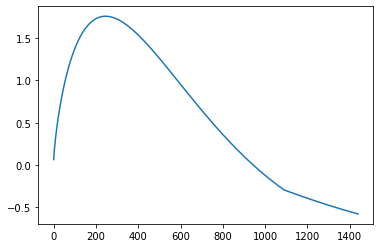

In [74]:
# look at the ES curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=30d for calibration
# imbalance completely to one side
df_ess[k_col].plot()

In [75]:
# TODO: something's wrong with the calculation after 1200. Has to do with my setting to 0 when g_inv < F^{-1}

In [76]:
# Above is the conditional ES ... to get unconditional numbers, multiply by alpha = 0.05

In [77]:
# set tau back in df ess (remember, tau is in days)
df_ess['tau'] = taus
df_ess

,Unnamed: 0,k=1.085034172449585e-06,k=8.595124868742567e-07,k=7.503045279039347e-07,k=6.814890575778717e-07,k=6.32574188945293e-07,k=5.952819360198797e-07,k=5.655120820061992e-07,k=5.409600379512467e-07,k=5.202128764269743e-07,...,k=2.923569061612607e-07,k=2.905553352519495e-07,k=2.887987866527444e-07,k=2.870853322194003e-07,k=2.8541315953886223e-07,k=2.8378056306294137e-07,k=2.821859360632414e-07,k=2.8062776331856415e-07,k=2.7910461445694035e-07,tau
0,t=3600,0.059264,0.060986,0.061820,0.062346,0.062721,0.063006,0.063234,0.063422,0.063581,...,0.065327,0.065341,0.065354,0.065367,0.065380,0.065393,0.065405,0.065417,0.065429,0.041667
1,t=7200,0.093285,0.096841,0.098567,0.099656,0.100431,0.101022,0.101494,0.101884,0.102213,...,0.105836,0.105864,0.105892,0.105920,0.105946,0.105972,0.105998,0.106022,0.106047,0.083333
2,t=10800,0.121210,0.126685,0.129345,0.131025,0.132221,0.133133,0.133862,0.134464,0.134972,...,0.140572,0.140616,0.140660,0.140702,0.140743,0.140783,0.140823,0.140861,0.140898,0.125000
3,t=14400,0.145578,0.153043,0.156675,0.158970,0.160603,0.161851,0.162847,0.163670,0.164365,...,0.172031,0.172092,0.172151,0.172209,0.172266,0.172321,0.172375,0.172427,0.172479,0.166667
4,t=18000,0.167457,0.176974,0.181610,0.184541,0.186629,0.188223,0.189497,0.190549,0.191438,...,0.201252,0.201330,0.201406,0.201480,0.201552,0.201623,0.201692,0.201759,0.201825,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999787,-0.997811,-0.993230,-0.986210,-0.977133,-0.966375,-0.954256,-0.941036,-0.926929,...,-0.229317,-0.214827,-0.200437,-0.186146,-0.171953,-0.157857,-0.143857,-0.129953,-0.116143,59.833333
1436,t=5173200,-0.999789,-0.997823,-0.993261,-0.986265,-0.977216,-0.966488,-0.954400,-0.941212,-0.927136,...,-0.230236,-0.215753,-0.201370,-0.187085,-0.172899,-0.158809,-0.144815,-0.130917,-0.117112,59.875000
1437,t=5176800,-0.999790,-0.997834,-0.993291,-0.986319,-0.977299,-0.966601,-0.954544,-0.941387,-0.927342,...,-0.231154,-0.216679,-0.202302,-0.188024,-0.173844,-0.159761,-0.145773,-0.131881,-0.118082,59.916667
1438,t=5180400,-0.999792,-0.997846,-0.993321,-0.986374,-0.977381,-0.966714,-0.954687,-0.941562,-0.927548,...,-0.232072,-0.217604,-0.203234,-0.188963,-0.174789,-0.160712,-0.146731,-0.132844,-0.119051,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

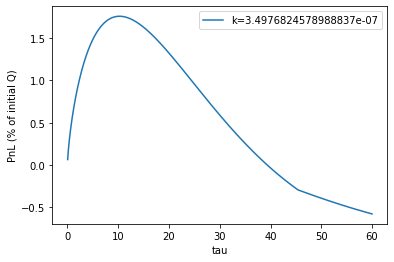

In [78]:
# now make the graph pretty ...
# y axis is % of initial Q expected to be printed as PnL (conditional ES)
df_ess.plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

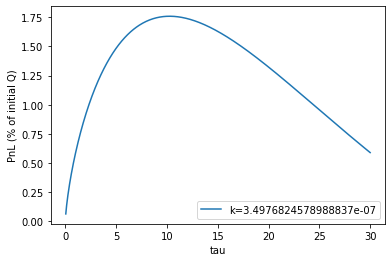

In [79]:
# Look at ES only over the anchor time ... (first 30d)
df_ess[:720].plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

In [47]:
# calibrate cap on Q off of area under curve over the anchor time divided by anchor time .. (first 30d)
# NOTE: this is expected amount printed *when* pnl exceeds var

<AxesSubplot:>

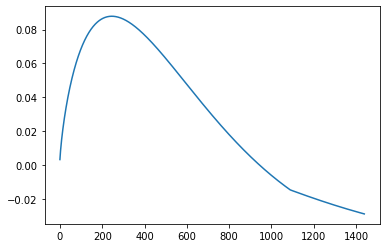

In [80]:
# unconditional ES numbers are alpha * conditional ES
# NOTE: calibrate cap on Q off unconditional ES to facilitate trading
(0.05 * df_ess[k_col]).plot()

<AxesSubplot:>

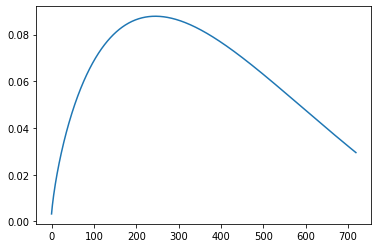

In [81]:
(0.05 * df_ess[k_col])[:720].plot()

In [82]:
# approximate integration w cum sum
((0.05 * df_ess[k_col])[:720]).cumsum()

0       0.003244
1       0.008490
2       0.015448
3       0.023953
4       0.033892
         ...    
715    46.358809
716    46.388759
717    46.418561
718    46.448215
719    46.477722
Name: k=3.4976824578988837e-07, Length: 720, dtype: float64

In [83]:
# "time average" is last element of cumsum divided by length of cumsum array
print('sum', ((0.05 * df_ess[k_col])[:720]).sum())
print('avg', ((0.05 * df_ess[k_col])[:720]).sum() / 720.0)

sum 46.477722234711074
avg 0.06455239199265426


In [84]:
# About 7% of initial Q should expect to print over 30d anchor time on average
# to account for times when PnL exceeds VaR (and imbalance all to one side)

In [85]:
# If only down to inflate currency supply of 50% for first year with 5 markets, so 10% each market,
# this ETH/USDC market has 10% / 12 = 0.83333% of total supply printed every month
0.1 / 12

0.008333333333333333

In [86]:
(0.1 / 12) / 0.0698012046934744

0.11938666918326703

In [87]:
# cap on Q can then be set around 12% of total supply for ETH/USDC market
# for unconditional expected shortfall per 30d to average around
# 0.1 / 12 per month or 10% of total supply printed by market per year